# Introduction


This project includes publicly available data titled 'Global Burden of Disease Study 2010 (GBD 2010) Mortality Results 1970-2010'. 
- Link: https://ghdx.healthdata.org/record/ihme-data/gbd-2010-mortality-results-1970-2010


The information about the countries' regions is from the unstats website.
- Link: https://unstats.un.org/unsd/methodology/m49/ 
- **Notes:** in 'Other groupings':
    - LDC = Least Developed Countries
    - LLDC = Land Locked Developing Countries
    - SIDS = Small Island Developing States



The GDP dataset was sourced from World Bank and OECD.
- Link: https://datahub.io/core/gdp

In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

In [400]:
df = pd.read_csv('IHME_GBD_2010_MORTALITY_AGE_SPECIFIC_BY_COUNTRY_1970_2010.csv')

In [401]:
df.head()

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
0,AFG,Afghanistan,1970,0-6 days,Male,"19,241","318,292.90"
1,AFG,Afghanistan,1970,0-6 days,Female,"12,600","219,544.20"
2,AFG,Afghanistan,1970,0-6 days,Both,"31,840","270,200.70"
3,AFG,Afghanistan,1970,7-27 days,Male,"15,939","92,701.00"
4,AFG,Afghanistan,1970,7-27 days,Female,"11,287","68,594.50"


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country Code            58905 non-null  object
 1   Country Name            58905 non-null  object
 2   Year                    58905 non-null  int64 
 3   Age Group               58905 non-null  object
 4   Sex                     58905 non-null  object
 5   Number of Deaths        58905 non-null  object
 6   Death Rate Per 100,000  58905 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [403]:
df['Number of Deaths'] = df['Number of Deaths'].str.replace(',', '').astype('int64') 
# selects the str datatypes in this column (all of the data are strings) and removes the comma. It then casts each value as an int instead.
df['Death Rate Per 100,000'] = df['Death Rate Per 100,000'].str.replace(',','').astype('float64')

In [404]:
df.head()

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
0,AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9
1,AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2
2,AFG,Afghanistan,1970,0-6 days,Both,31840,270200.7
3,AFG,Afghanistan,1970,7-27 days,Male,15939,92701.0
4,AFG,Afghanistan,1970,7-27 days,Female,11287,68594.5


In [405]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,58905.0,1990.000000,14.142256,1970.0,1980.0,1990.0,2000.0,2010.0
Number of Deaths,58905.0,16109.935744,154329.315405,0.0,166.0,1020.0,4460.0,9938487.0
"Death Rate Per 100,000",58905.0,7062.866458,24582.548947,5.5,210.3,825.0,3611.8,423790.2


In [406]:
df.nunique()

Country Code                187
Country Name                187
Year                          5
Age Group                    21
Sex                           3
Number of Deaths          16074
Death Rate Per 100,000    32314
dtype: int64

In [407]:
print(df.isna().sum())
df.loc[df.duplicated() == True]

# no null values and no duplicates

Country Code              0
Country Name              0
Year                      0
Age Group                 0
Sex                       0
Number of Deaths          0
Death Rate Per 100,000    0
dtype: int64


,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"


In [408]:
regions = pd.read_csv('country_regions.csv')
regions = regions.drop(['Country Name','M49 Code'],axis=1)
dff = pd.merge(left = df, right=regions, on='Country Code', how='left')
dff.head()


,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000",Other groupings,Region
0,AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9,LDC LLDC,Asia
1,AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2,LDC LLDC,Asia
2,AFG,Afghanistan,1970,0-6 days,Both,31840,270200.7,LDC LLDC,Asia
3,AFG,Afghanistan,1970,7-27 days,Male,15939,92701.0,LDC LLDC,Asia
4,AFG,Afghanistan,1970,7-27 days,Female,11287,68594.5,LDC LLDC,Asia


In [409]:
dff.loc[dff['Region'].isna()]['Country Name'].value_counts()

Country Name
Taiwan    315
Name: count, dtype: int64

In [410]:
dff.loc[dff['Country Name']== 'Taiwan','Region'] = 'Asia'

In [411]:
dff.loc[dff['Region'].isna()]['Country Name'].value_counts()

df = dff.copy()

In [412]:
df['Other groupings'].value_counts()

Other groupings
SIDS        8505
LDC         6300
LLDC        5040
LDC LLDC    4725
LDC SIDS    1890
Name: count, dtype: int64

In [413]:
df['LDC'] = df['Other groupings'].str.contains(r'\bLDC\b', na=False).astype('int64')
df['LLDC'] = df['Other groupings'].str.contains(r'\bLLDC\b', na=False).astype('int64')
df['SIDS'] = df['Other groupings'].str.contains(r'\bSIDS\b', na=False).astype('int64')


In [414]:
df = df.drop('Other groupings', axis=1)
df.head()

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000",Region,LDC,LLDC,SIDS
0,AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9,Asia,1,1,0
1,AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2,Asia,1,1,0
2,AFG,Afghanistan,1970,0-6 days,Both,31840,270200.7,Asia,1,1,0
3,AFG,Afghanistan,1970,7-27 days,Male,15939,92701.0,Asia,1,1,0
4,AFG,Afghanistan,1970,7-27 days,Female,11287,68594.5,Asia,1,1,0


**Changes**
- the original regions source did not contain information for Taiwan, so I added 'Region' as 'Asia' manually.
- the 'Other groupings' column contained a mix of 'LDC', 'LDC LLDC', 'LDC SIDS', and 'SIDS'. To account for some countries' overlaps with these indicators, I converted 'LDC', 'SIDS', and 'LLDC' into respective binary columns and removed the 'Other groupings' column

# EDA

## Univariate Analyses

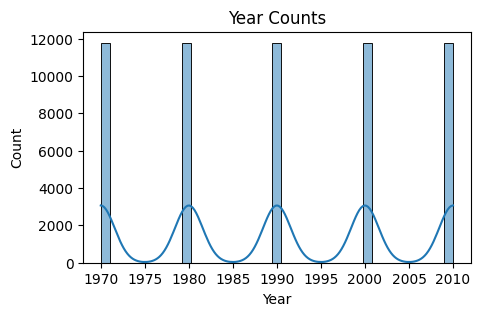

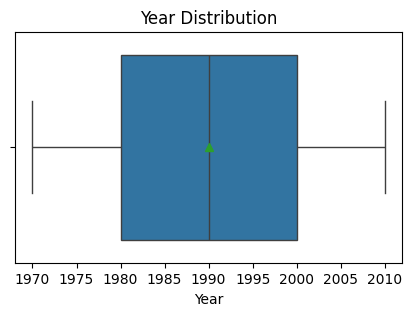

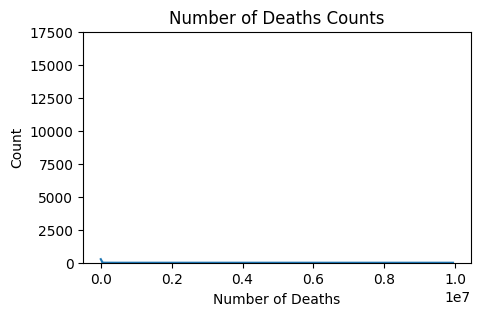

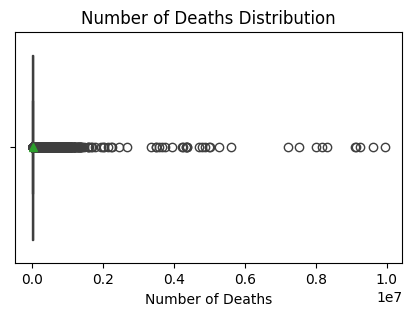

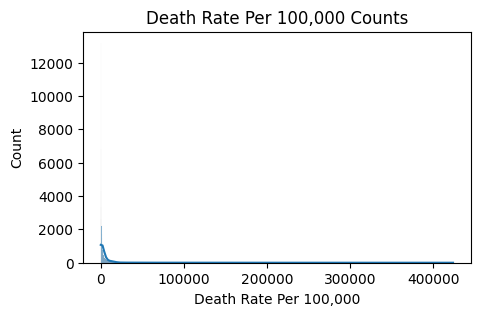

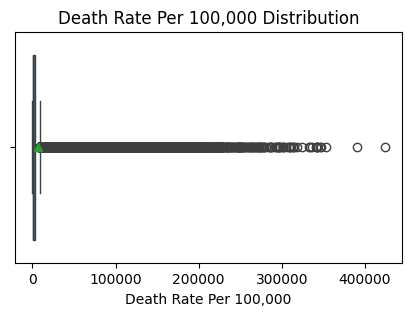

In [415]:
numData = df.select_dtypes('number').drop(['LDC','LLDC','SIDS'], axis=1)

for col in numData.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(data=df, x=col,kde=True)
    plt.title(f'{col} Counts')
    plt.show()

    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x=col ,showmeans=True)
    plt.title(f'{col} Distribution')
    plt.show()



**Observations of numerical data**

The data includes records from 5 different years: 1970, 1980, 1990, 2000, and 2010. Each of these years contains around the same amount of records.

The death rates and the number of deaths may have to be examined more closely. I will take the logs of the Death Number and the Death Rate Per 100,000 to handle the extreme outliers.

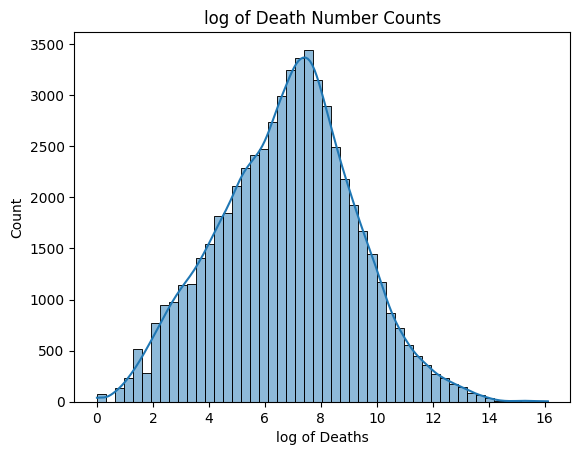

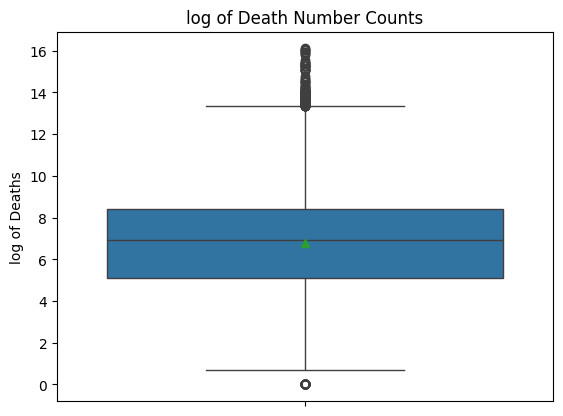

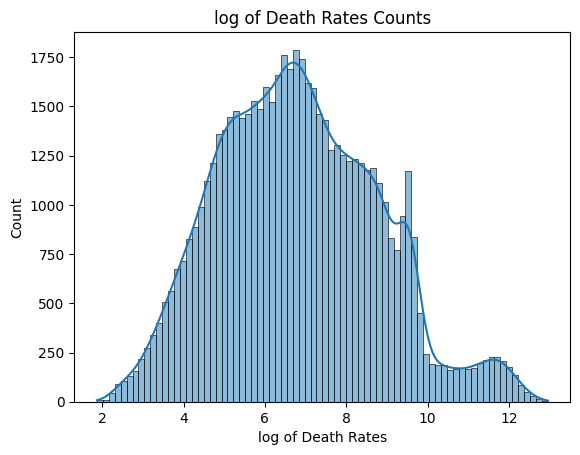

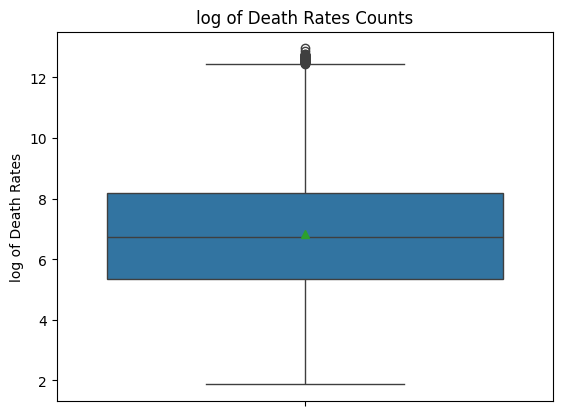

In [416]:
df['log of Deaths'] = np.log1p(df['Number of Deaths'])
df['log of Death Rates'] = np.log1p(df['Death Rate Per 100,000'])

sns.histplot(df['log of Deaths'], bins=50, kde=True)
plt.title('log of Death Number Counts')
plt.show()
plt.title('log of Death Number Counts')
sns.boxplot(df['log of Deaths'], showmeans=True)
plt.show()


plt.title('log of Death Rates Counts')
sns.histplot(df['log of Death Rates'], kde=True)
plt.show()
plt.title('log of Death Rates Counts')
sns.boxplot(df['log of Death Rates'], showmeans=True)
plt.show()

numData = df.select_dtypes('number')


**Observations**

We can now see the distributions of the death rates and the death counts by taking the logs of their values. We can see that both death numbers and death rates have a normal distribution.

In [417]:
catData = df.select_dtypes(include='object')
catData

,Country Code,Country Name,Age Group,Sex,Region
0,AFG,Afghanistan,0-6 days,Male,Asia
1,AFG,Afghanistan,0-6 days,Female,Asia
2,AFG,Afghanistan,0-6 days,Both,Asia
3,AFG,Afghanistan,7-27 days,Male,Asia
4,AFG,Afghanistan,7-27 days,Female,Asia
...,...,...,...,...,...
58900,ZWE,Zimbabwe,80+ years,Female,Africa
58901,ZWE,Zimbabwe,80+ years,Both,Africa
58902,ZWE,Zimbabwe,All ages,Male,Africa
58903,ZWE,Zimbabwe,All ages,Female,Africa


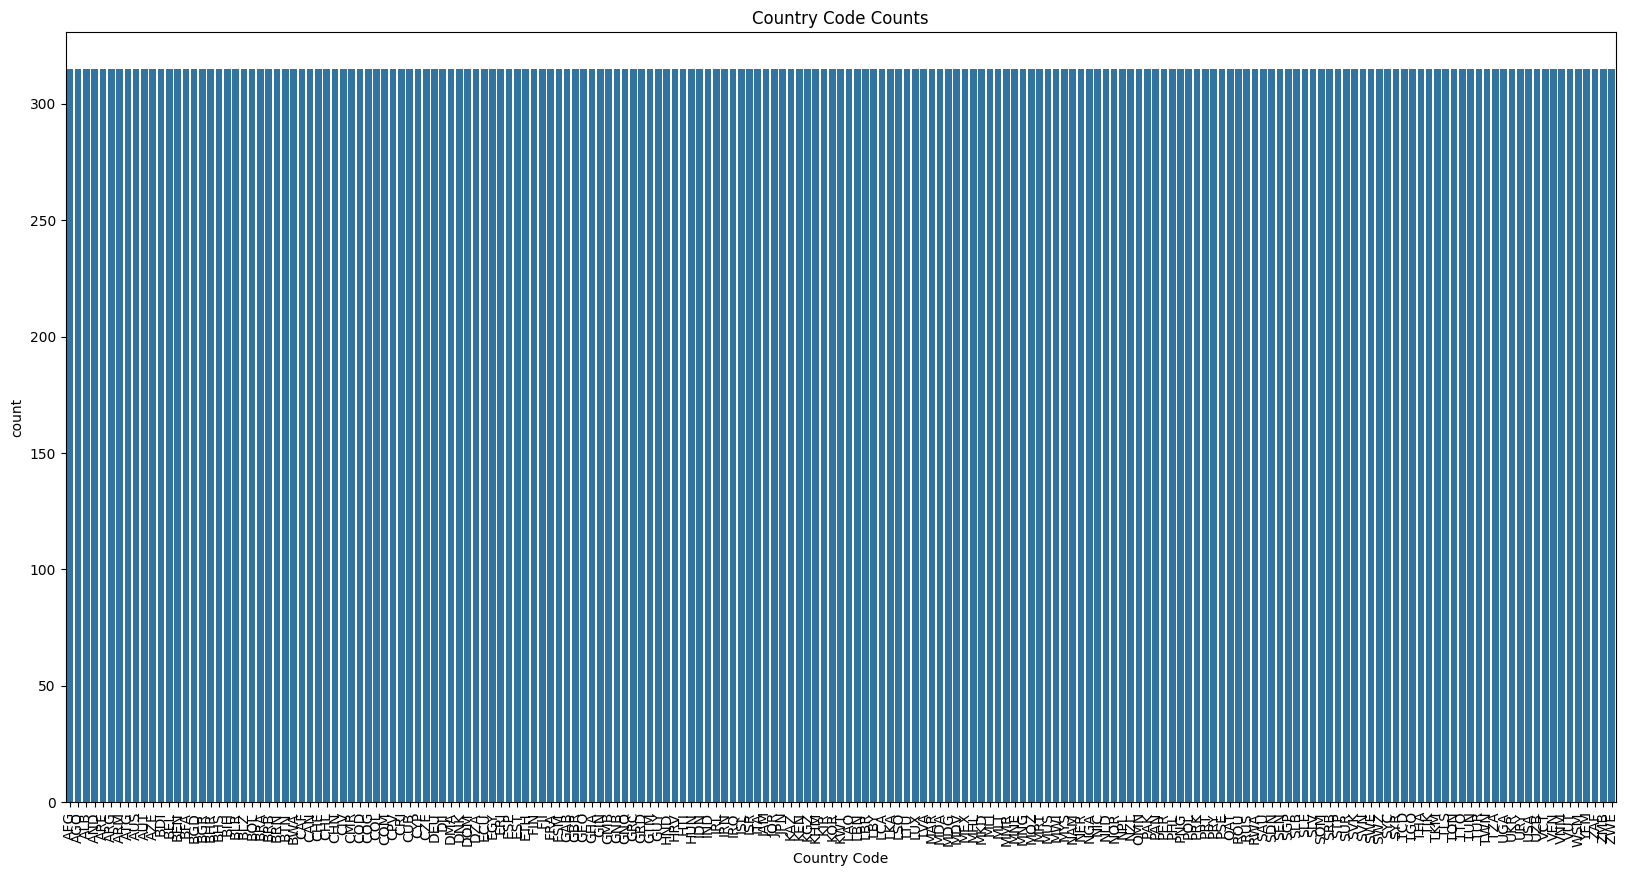

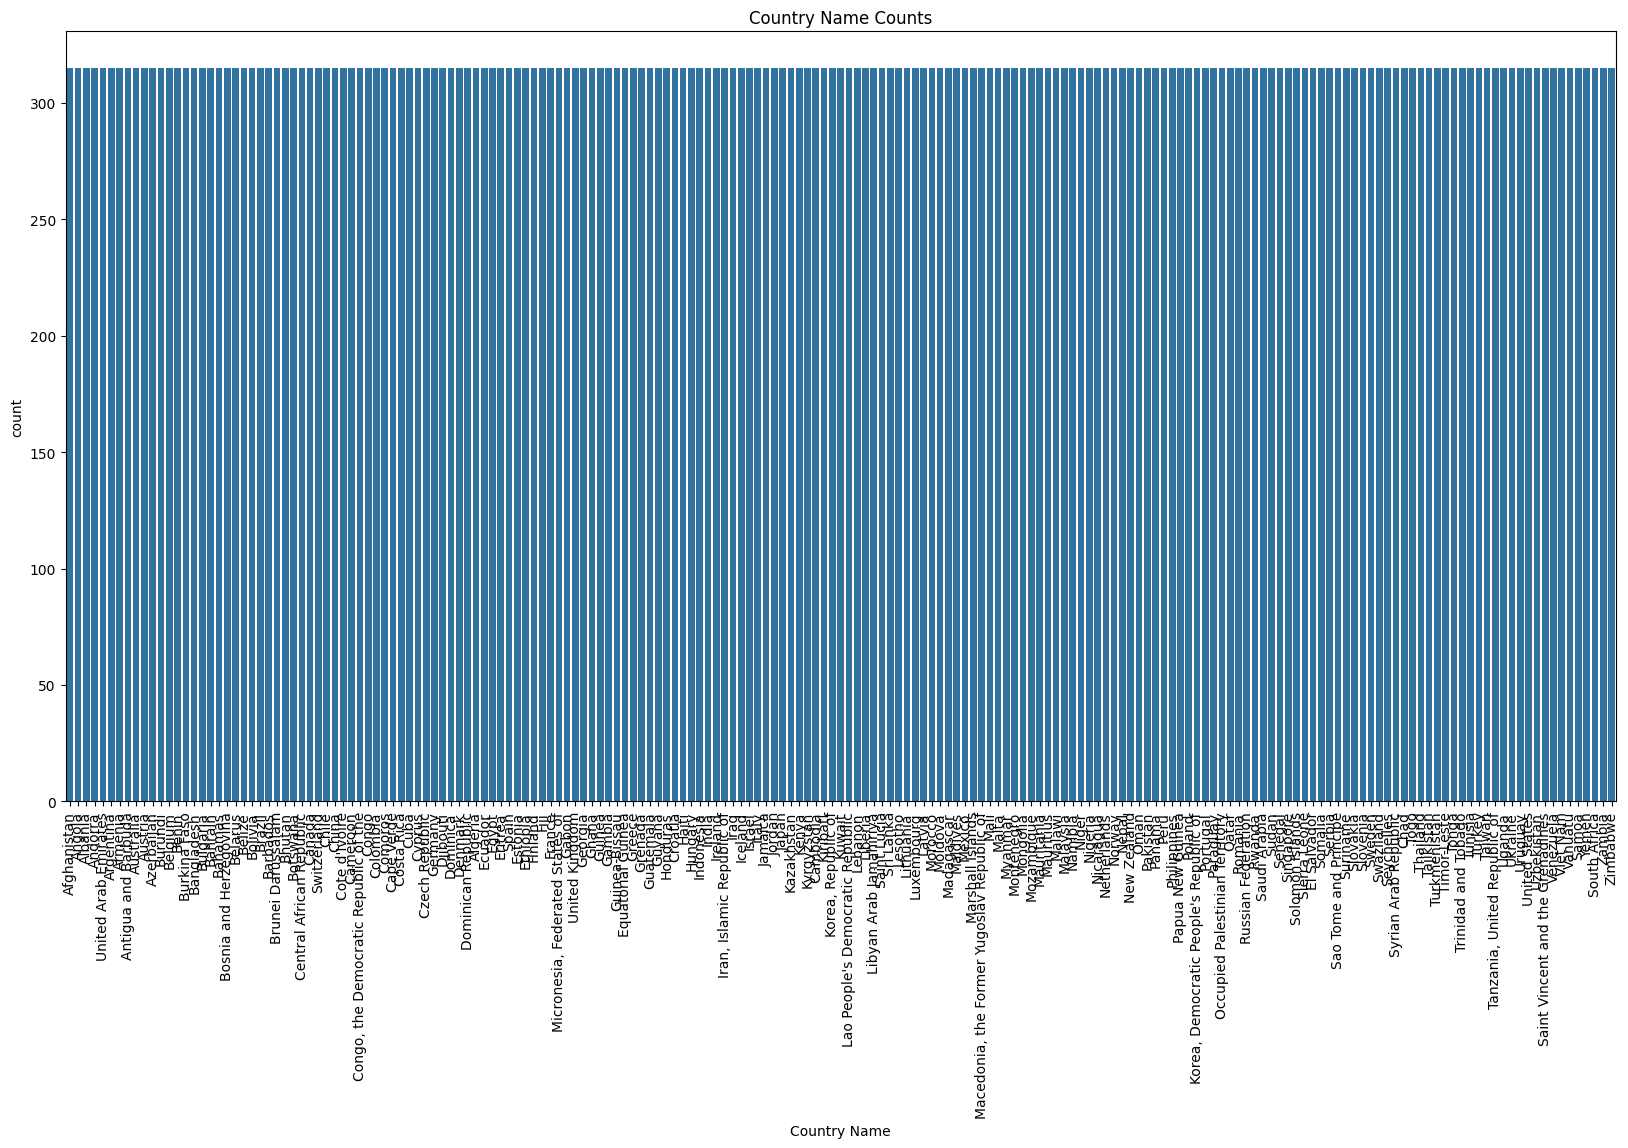

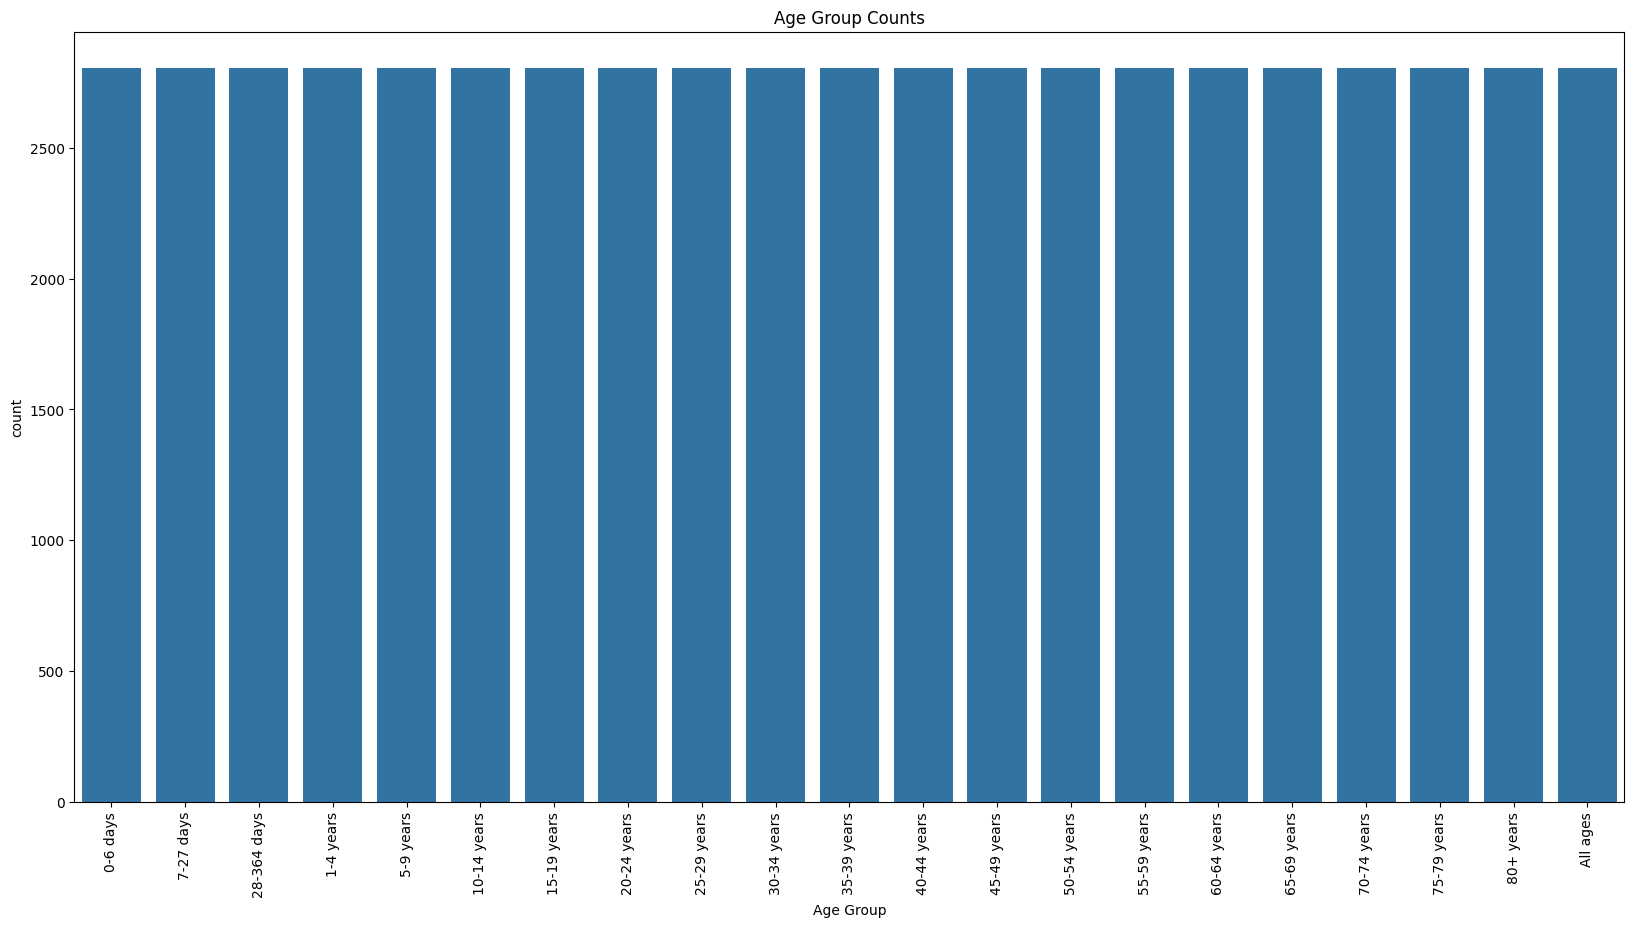

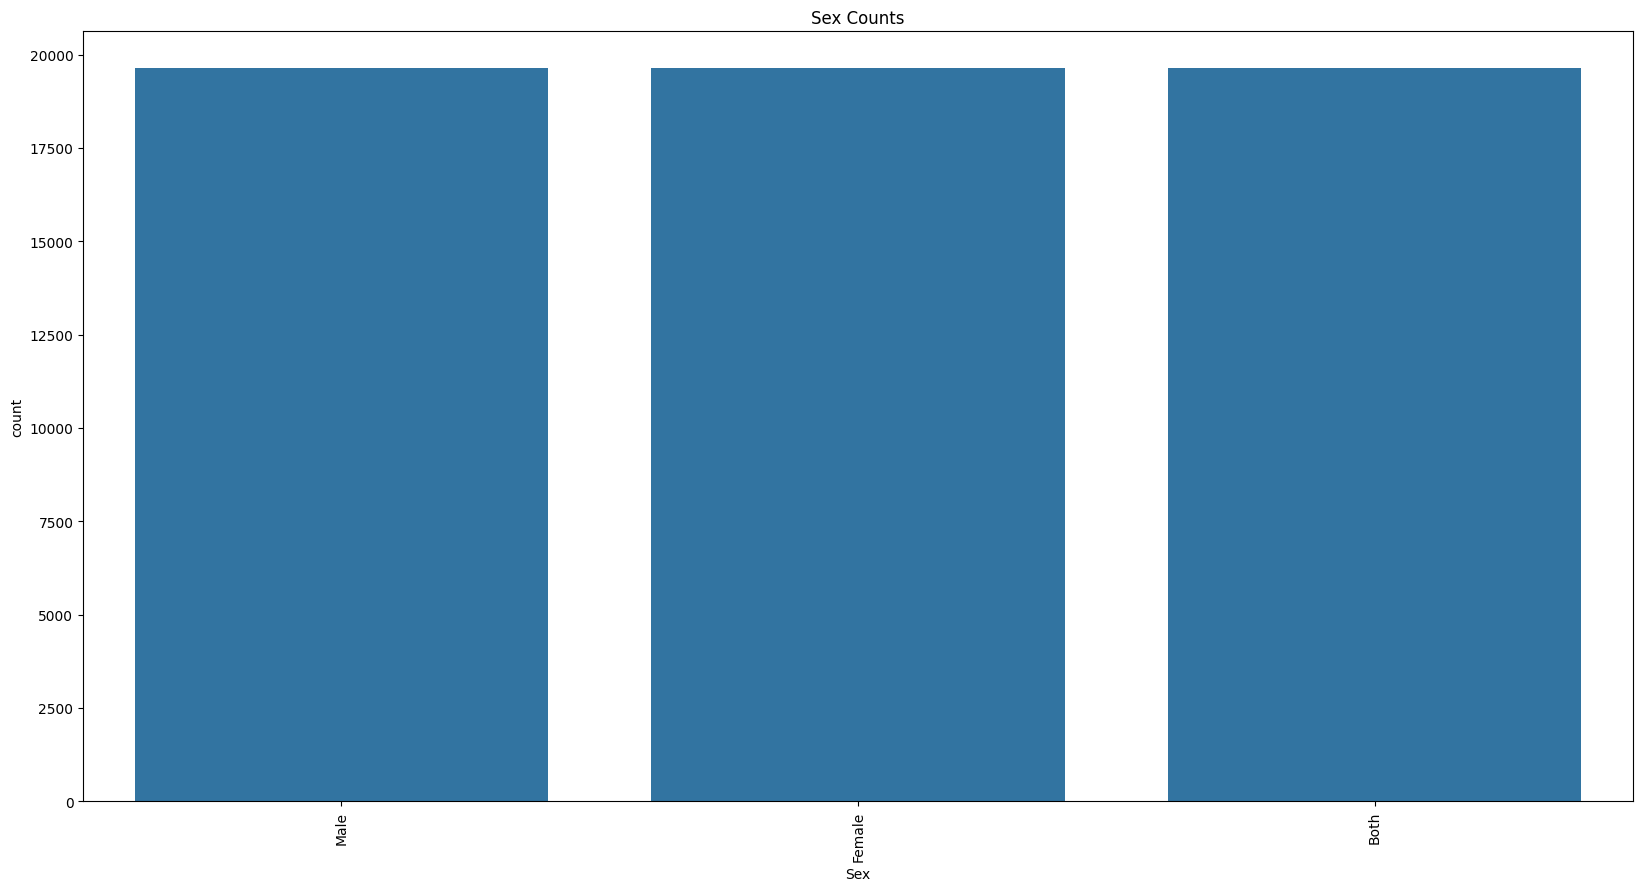

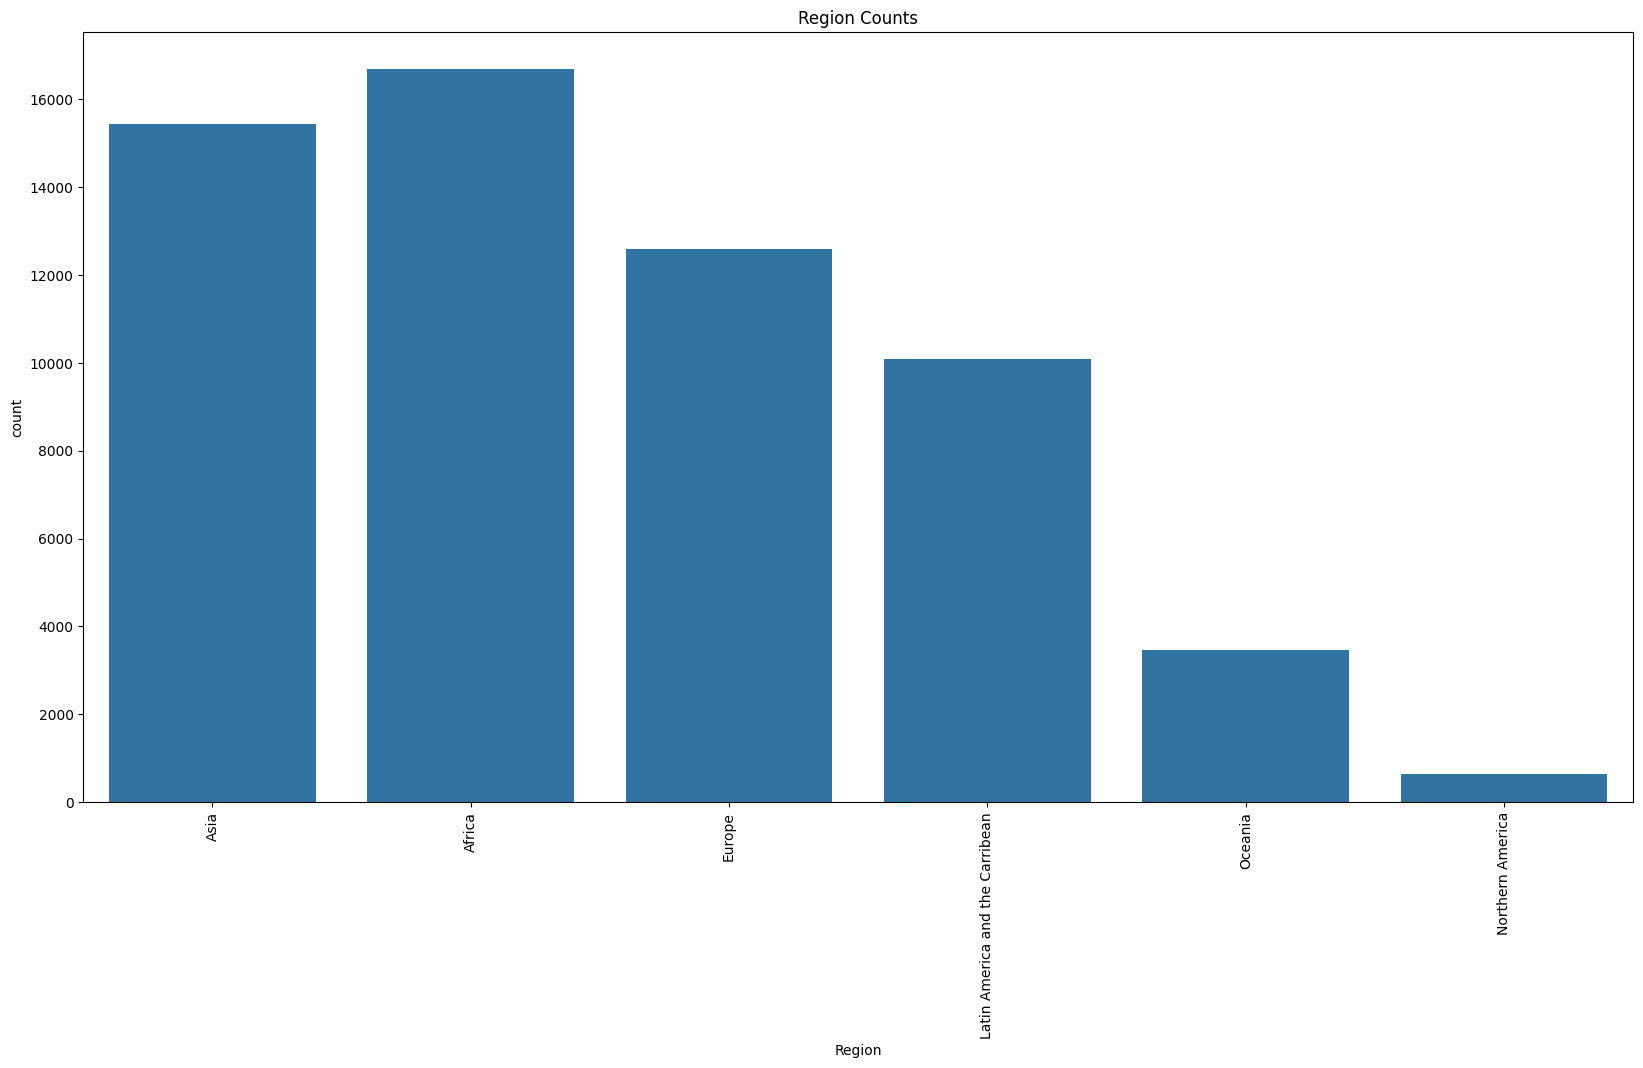

In [418]:
catData = df.select_dtypes(include='object')

for cat in catData:
    plt.figure(figsize=(20,10))
    sns.countplot(data=df, x=cat)
    plt.xticks(rotation=90)
    plt.title(f'{cat} Counts')
    plt.show()
    

**Observations**

Looking at each of the bar graphs, we can see that the groups within the categorical variables are fairly even in size (except for the 'Region Counts' bar graph). We now know that in our data, every demographic is equally represented.


The differences in the Region Counts is accounted for by the fact that some regions contain more countries than others.

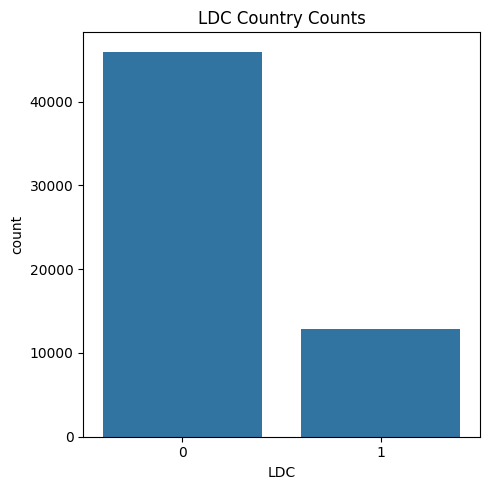

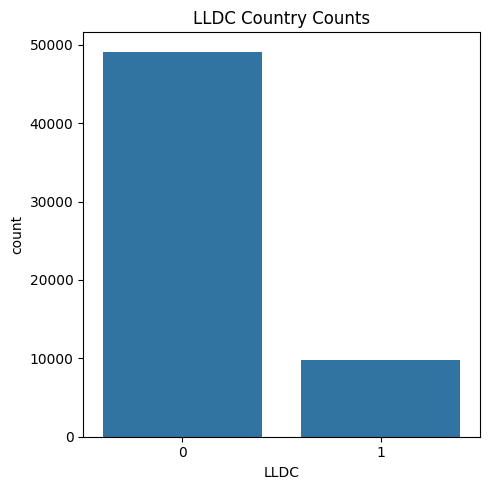

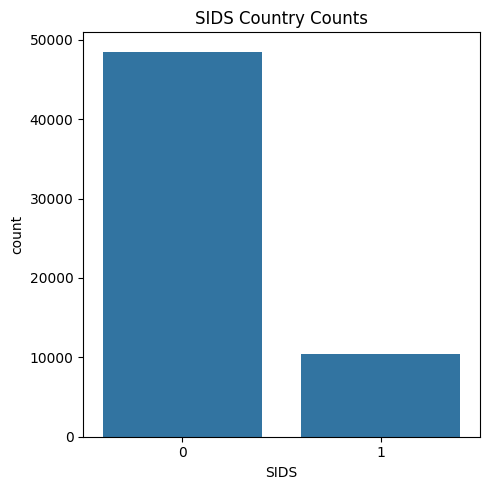

In [419]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='LDC')
plt.title('LDC Country Counts')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(data=df, x='LLDC')
plt.title('LLDC Country Counts')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(data=df, x='SIDS')
plt.title('SIDS Country Counts')
plt.tight_layout()
plt.show()

## Bivariate Analyses


We should now observe any relationships between variables and make predictions about whether or not they could affect death rates.

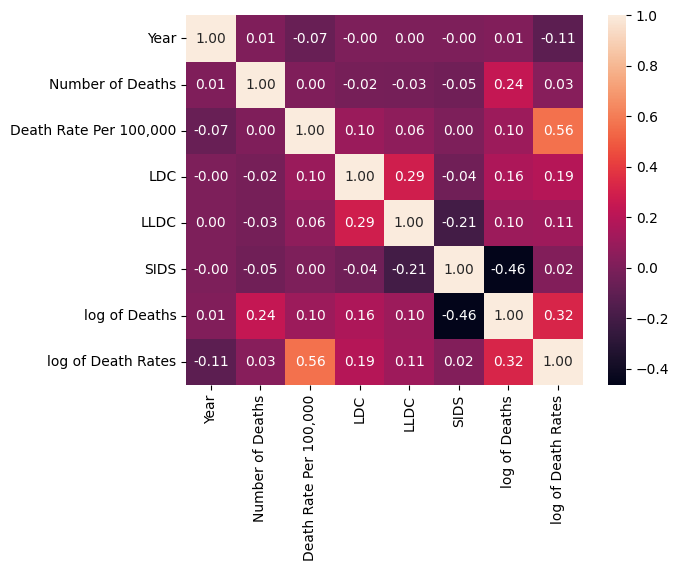

In [420]:
numData = df.select_dtypes('number')

sns.heatmap(data=numData.corr(), annot=True, fmt='0.2f')
plt.show()

**Observations**

Checking the correlations among the numerical data, there seem to be no notable correlations between any two variables.

In [421]:
df_agg = df.groupby('Country Code').agg({
    'Death Rate Per 100,000' : 'mean',
    'log of Death Rates': 'mean',
    'log of Deaths' : 'mean'
}).reset_index()

df_agg

,Country Code,"Death Rate Per 100,000",log of Death Rates,log of Deaths
0,AFG,14063.417143,7.785340,8.924231
1,AGO,10759.831111,7.714393,8.364128
2,ALB,3055.045079,6.406921,5.901102
3,AND,1967.449524,5.554109,1.599358
4,ARE,4483.371746,6.391870,4.831449
...,...,...,...,...
182,WSM,4562.136190,6.752055,3.307873
183,YEM,12023.699683,7.390139,8.146983
184,ZAF,7023.552063,7.257923,9.179520
185,ZMB,8943.687619,7.611413,7.953006


In [422]:

fig = px.choropleth(
    df_agg,
    locations='Country Code',
    locationmode='ISO-3',
    color='Death Rate Per 100,000',
    hover_name=None,
    color_continuous_scale='Reds',
    title='Averages of Death Rates Per 100,000 by Country'

)
fig.show()

fig2 = px.choropleth(
    df_agg,
    locations='Country Code',
    locationmode='ISO-3',
    color='log of Death Rates',
    color_continuous_scale='Reds',
    title='Averages of the log of Death Rates by Country'

)
fig2.show()

**Observations**

We can see that the death rates seem to be particularly high in African countries, and in some Asian countries, such as Afghanistan. In the first figure with the raw death rates per 100,000, we can see that Mali (MLI) is a very high outlier. We also see in both figures that North American countries tend to have lower death rates.

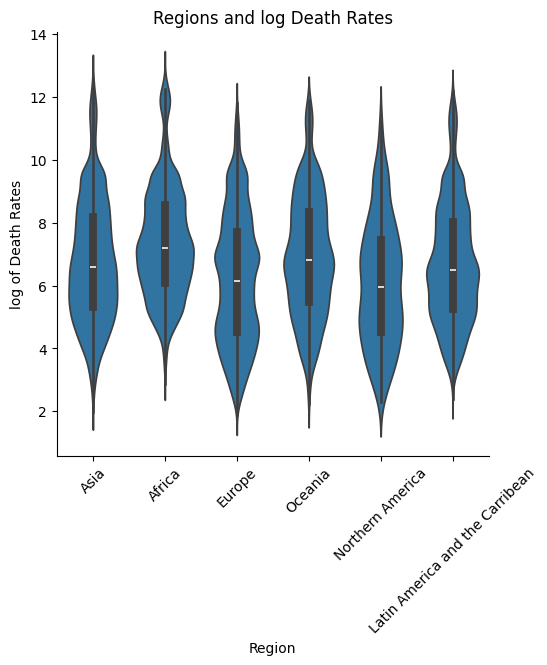

In [423]:
sns.catplot(data=df, x='Region',y='log of Death Rates', kind='violin', order=['Asia','Africa','Europe','Oceania','Northern America','Latin America and the Carribean'])
plt.xticks(rotation=45)
plt.title('Regions and log Death Rates')
plt.show()

**Observations**

When looking at the figure above, we can see that regions in Africa tend to have higher log Death Rates in comparison to other regions. In Africa, there is also a small distribution of data ~12 for the log death rates, which is relatively high

In [424]:
df.head()

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000",Region,LDC,LLDC,SIDS,log of Deaths,log of Death Rates
0,AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9,Asia,1,1,0,9.864851,12.670730
1,AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2,Asia,1,1,0,9.441531,12.299313
2,AFG,Afghanistan,1970,0-6 days,Both,31840,270200.7,Asia,1,1,0,10.368510,12.506924
3,AFG,Afghanistan,1970,7-27 days,Male,15939,92701.0,Asia,1,1,0,9.676587,11.437145
4,AFG,Afghanistan,1970,7-27 days,Female,11287,68594.5,Asia,1,1,0,9.331495,11.135982


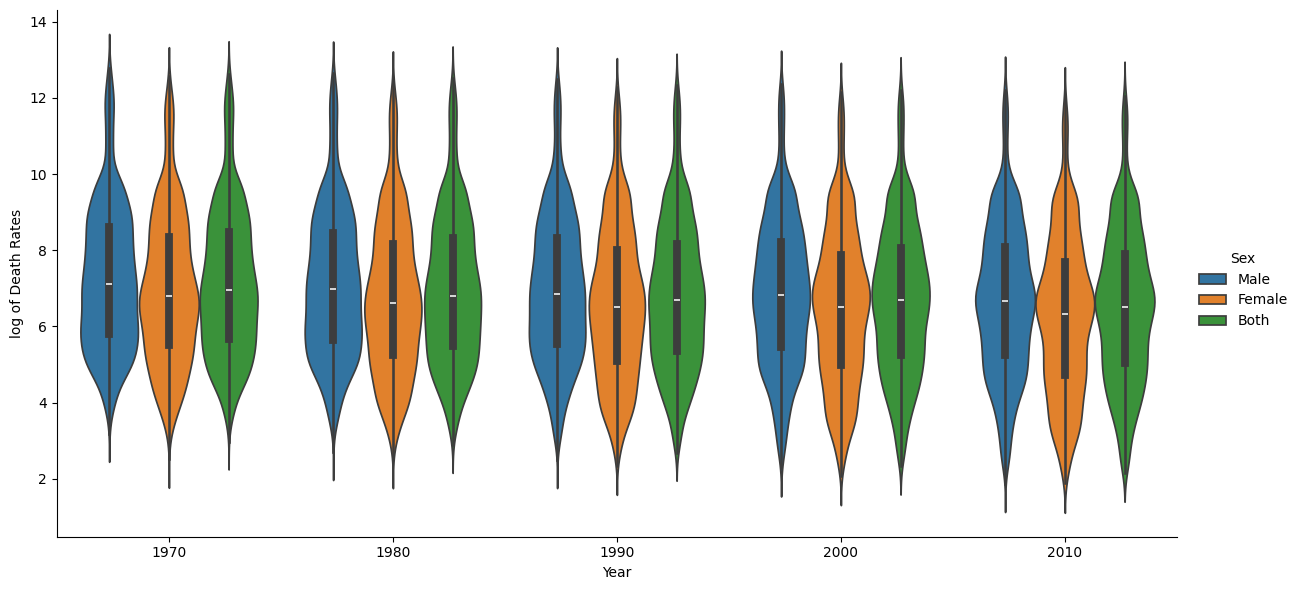

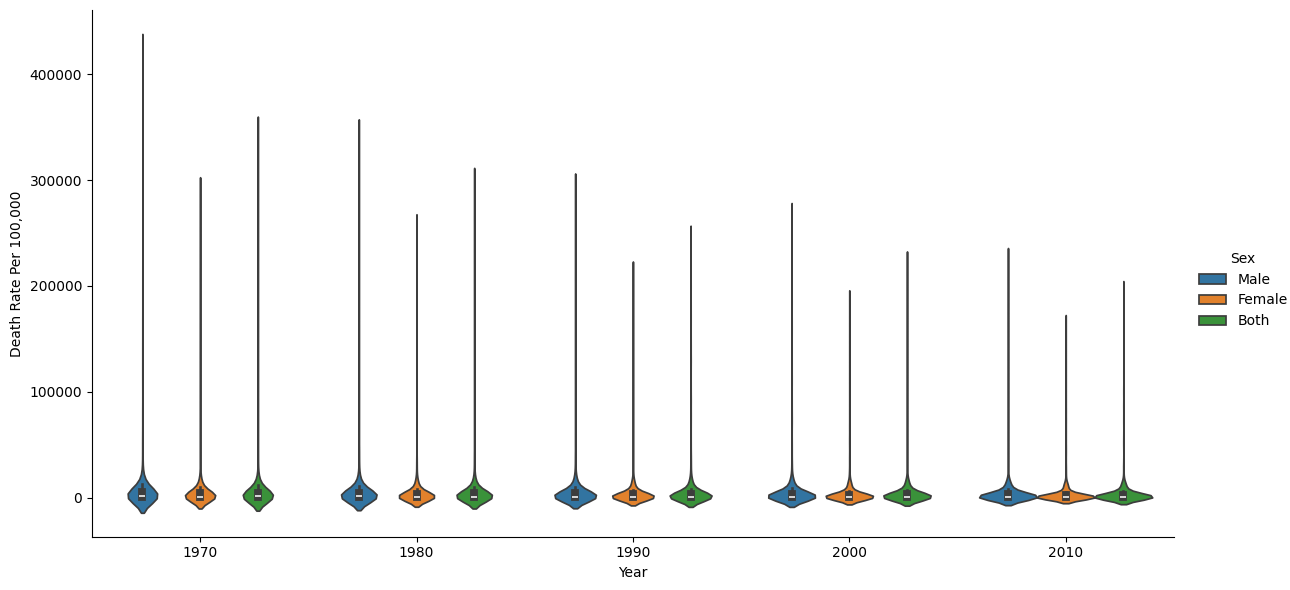

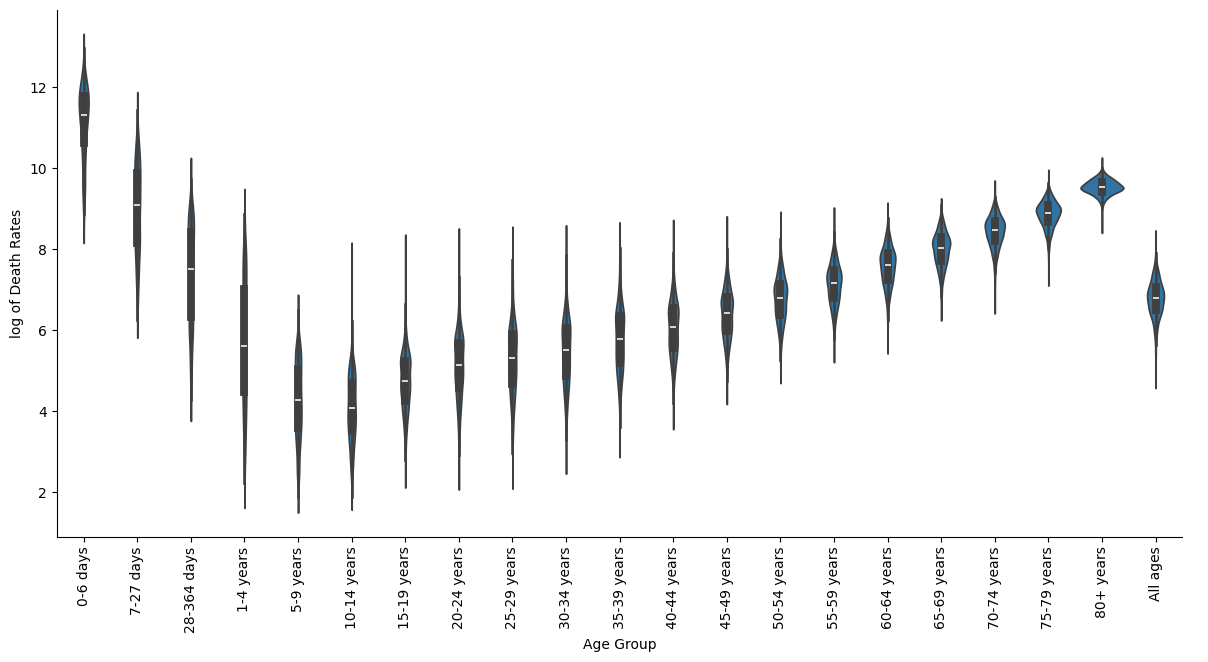

In [425]:

g = sns.catplot(data=df, x='Year', y='log of Death Rates',kind='violin', hue='Sex', height=6, aspect=2)
g._legend.set_bbox_to_anchor((1,0.5))

plt.show()

g = sns.catplot(data=df, x='Year', y='Death Rate Per 100,000',kind='violin', hue='Sex', height=6, aspect=2)
g._legend.set_bbox_to_anchor((1,0.5))
plt.show()

sns.catplot(data=df, x='Age Group', y='log of Death Rates',kind='violin',height=6, aspect=2)
plt.xticks(rotation=90)
plt.show()

**Observations**

Looking at the first figure, we can see that the death rates (adjusted by taking the logs of the Death Rates Per 100,000) seem to have a downwards trend as the years go by. However, the decrease in death rates may not be as dramatic. This decrease is more apparent when looking at the raw Death Rates Per 100,000 and its distribution spreads, as shown in the figure below it.

In the last figure, we look at the log of death rates, but by Age Group. We can see that newborns have especially high death rates. The death rates seem to drop, up utnil the 5-9 year age range. The distributions seem to increase in death rate afterwards.

# Model Preprocessing

mean squared error: evaluates model performance based on the errors between the predicted and the actual values


In [426]:
df.head()

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000",Region,LDC,LLDC,SIDS,log of Deaths,log of Death Rates
0,AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9,Asia,1,1,0,9.864851,12.670730
1,AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2,Asia,1,1,0,9.441531,12.299313
2,AFG,Afghanistan,1970,0-6 days,Both,31840,270200.7,Asia,1,1,0,10.368510,12.506924
3,AFG,Afghanistan,1970,7-27 days,Male,15939,92701.0,Asia,1,1,0,9.676587,11.437145
4,AFG,Afghanistan,1970,7-27 days,Female,11287,68594.5,Asia,1,1,0,9.331495,11.135982


In [427]:
df2 = df.copy()
df2 = df2.drop(['Country Name','Country Code','Number of Deaths','Death Rate Per 100,000','log of Deaths'], axis=1)
# Dropping unnecessary columns
df2.head()


,Year,Age Group,Sex,Region,LDC,LLDC,SIDS,log of Death Rates
0,1970,0-6 days,Male,Asia,1,1,0,12.670730
1,1970,0-6 days,Female,Asia,1,1,0,12.299313
2,1970,0-6 days,Both,Asia,1,1,0,12.506924
3,1970,7-27 days,Male,Asia,1,1,0,11.437145
4,1970,7-27 days,Female,Asia,1,1,0,11.135982


In [428]:
data = pd.get_dummies(
    df2,
    columns = df2.select_dtypes(include = ['object','category']).columns.tolist(),
    drop_first=True, # to prevent redundancy
)
# encodes the categorical variables

data.head()

,Year,LDC,LLDC,SIDS,log of Death Rates,Age Group_1-4 years,Age Group_10-14 years,Age Group_15-19 years,Age Group_20-24 years,Age Group_25-29 years,...,Age Group_75-79 years,Age Group_80+ years,Age Group_All ages,Sex_Female,Sex_Male,Region_Asia,Region_Europe,Region_Latin America and the Carribean,Region_Northern America,Region_Oceania
0,1970,1,1,0,12.670730,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,1970,1,1,0,12.299313,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,1970,1,1,0,12.506924,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1970,1,1,0,11.437145,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,1970,1,1,0,11.135982,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


# Linear Regression

In [429]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [430]:
X = data.drop('log of Death Rates',axis=1)
y = data['log of Death Rates']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(
    "X_train shape: ", X_train.shape,
    "\nX_test shape: ", X_test.shape,
    "\ny_train shape: ",y_train.shape,
    "\ny_test shape: ",y_test.shape
)

X_train shape:  (47124, 31) 
X_test shape:  (11781, 31) 
y_train shape:  (47124,) 
y_test shape:  (11781,)


In [431]:
model = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42)) # makes a pipline to scale and use LassoCV for feature selection with 5 folds and reproducibility 
model2 = make_pipeline(StandardScaler(), LinearRegression())

In [432]:
def predict_and_metrics(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)


    dfmetrics = pd.DataFrame( {
        'Group':['Training Data','Testing Data'],
        'r2' : [r2_train, r2_test],
        'MSE' : [mse_train, mse_test],
        'RMSE ' : [np.sqrt(mse_train), np.sqrt(mse_test)]
    })



    return dfmetrics[:]

In [433]:
print('Pipeline using StandardScaler and LassoCV')

predict_and_metrics(model, X_train, y_train, X_test, y_test)

Pipeline using StandardScaler and LassoCV


,Group,r2,MSE,RMSE
0,Training Data,0.919307,0.313023,0.559484
1,Testing Data,0.919496,0.310391,0.557128


In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Pipeline using StandardScaler and LinearRegression')

predict_and_metrics(model2, X_train, y_train, X_test, y_test)

Pipeline using StandardScaler and LinearRegression


,Group,r2,MSE,RMSE
0,Training Data,0.919349,0.312858,0.559337
1,Testing Data,0.919545,0.310201,0.556957


In [435]:
np.exp(0.56) # average error (RMSE) scaled to the actual death rate

1.7506725002961012

**Observations**

- The performance on the training and testing data for both pipelines (Linear Regression and LassoCV) are very similar to one another, indicating that the models did not overfit.

- The R^2 values of about 0.92 means that about 92% of the variance in the log-transformed Death Rates can be explained by the independent variables: encoded Region, encoded Age Group, Sex, LLC, LLDC, SIDS, and Year.

- The death rates were log-transformed in order to account for the extreme skewness and outliers, and to stabilize the variance. Therefore, the model's performance is best interpreted in a relative scale rather than an absolute scale.

- The MSE was ~0.32, and the RMSE was ~0.56 for the models in log space. This means that there is an average multiplicative error of ~1.75x in the actual death rates. The predictions are up to 1.75x within the true death rates.

# Adding GDP as an Independent Variable


In [436]:
gdp = pd.read_csv('gdp.csv')
gdp.nunique()

Country Name      262
Country Code      262
Year               64
Value           13900
dtype: int64

In [437]:
df_with_gdp = pd.merge(left= df.drop('Country Name',axis=1), right=gdp, on=['Country Code','Year'], how='left')

df_with_gdp = df_with_gdp.dropna()

In [438]:
df.info()
df_with_gdp.info()

print('Proportion of Entries Lost: ',(58905 - 51219) / 58905)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            58905 non-null  object 
 1   Country Name            58905 non-null  object 
 2   Year                    58905 non-null  int64  
 3   Age Group               58905 non-null  object 
 4   Sex                     58905 non-null  object 
 5   Number of Deaths        58905 non-null  int64  
 6   Death Rate Per 100,000  58905 non-null  float64
 7   Region                  58905 non-null  object 
 8   LDC                     58905 non-null  int64  
 9   LLDC                    58905 non-null  int64  
 10  SIDS                    58905 non-null  int64  
 11  log of Deaths           58905 non-null  float64
 12  log of Death Rates      58905 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFram

After dropping the null values, we lost about 13% of the data. This is a good portion of the data and the data loss can introduce biases in our analysis. I will try to impute the data using the averages of the respective countries

In [439]:
df_with_gdp = pd.merge(left= df.drop('Country Name',axis=1), right=gdp, on=['Country Code','Year'], how='left')

df_with_gdp['GDP imputed'] = df_with_gdp.groupby('Country Code')['Value'].transform(lambda x: x.fillna(x.mean()))


In [440]:
df_with_gdp=df_with_gdp.drop('Value', axis=1)
df_with_gdp = df_with_gdp.drop('Country Name', axis=1)
df_with_gdp.info()

df_with_gdp[df_with_gdp['GDP imputed'].isna()][['Country Code', 'Year']].drop_duplicates().reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            58905 non-null  object 
 1   Year                    58905 non-null  int64  
 2   Age Group               58905 non-null  object 
 3   Sex                     58905 non-null  object 
 4   Number of Deaths        58905 non-null  int64  
 5   Death Rate Per 100,000  58905 non-null  float64
 6   Region                  58905 non-null  object 
 7   LDC                     58905 non-null  int64  
 8   LLDC                    58905 non-null  int64  
 9   SIDS                    58905 non-null  int64  
 10  log of Deaths           58905 non-null  float64
 11  log of Death Rates      58905 non-null  float64
 12  GDP imputed             58275 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.8+ MB


,Country Code,Year
0,PRK,1970
1,PRK,1980
2,PRK,1990
3,PRK,2000
4,PRK,2010
5,TWN,1970
6,TWN,1980
7,TWN,1990
8,TWN,2000
9,TWN,2010


In [441]:
df_with_gdp.isna().sum()

print('Proportion of lost data: ',630/58905)

Proportion of lost data:  0.0106951871657754


After imputing the NaN values when possible, we can see that there is missing data for PRK (North Korea) and TWN (Taiwan). Omitting these two countries for the GDP analysis would only lead to 1% of data loss. I will now drop the rest of the NaN columns

In [442]:
df_with_gdp = df_with_gdp.dropna()

df_with_gdp.isna().sum()

Country Code              0
Year                      0
Age Group                 0
Sex                       0
Number of Deaths          0
Death Rate Per 100,000    0
Region                    0
LDC                       0
LLDC                      0
SIDS                      0
log of Deaths             0
log of Death Rates        0
GDP imputed               0
dtype: int64

In [475]:
df_with_gdp.loc[df_with_gdp.duplicated() == True]

,Country Code,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000",Region,LDC,LLDC,SIDS,log of Deaths,log of Death Rates,GDP imputed,log GDP


No more null values and no duplicates.

In [478]:
df3 = df_with_gdp.drop(['Country Code','Number of Deaths','Death Rate Per 100,000','log of Deaths','GDP imputed'],axis=1)
df3

,Year,Age Group,Sex,Region,LDC,LLDC,SIDS,log of Death Rates,log GDP
0,1970,0-6 days,Male,Asia,1,1,0,12.670730,22.994262
1,1970,0-6 days,Female,Asia,1,1,0,12.299313,22.994262
2,1970,0-6 days,Both,Asia,1,1,0,12.506924,22.994262
3,1970,7-27 days,Male,Asia,1,1,0,11.437145,22.994262
4,1970,7-27 days,Female,Asia,1,1,0,11.135982,22.994262
...,...,...,...,...,...,...,...,...,...
58900,2010,80+ years,Female,Africa,0,1,0,9.691556,23.211638
58901,2010,80+ years,Both,Africa,0,1,0,9.719252,23.211638
58902,2010,All ages,Male,Africa,0,1,0,7.186220,23.211638
58903,2010,All ages,Female,Africa,0,1,0,7.100192,23.211638


This is a new dataframe containing only the variables necessary for the linear regression models later.

## Brief EDA with GDP

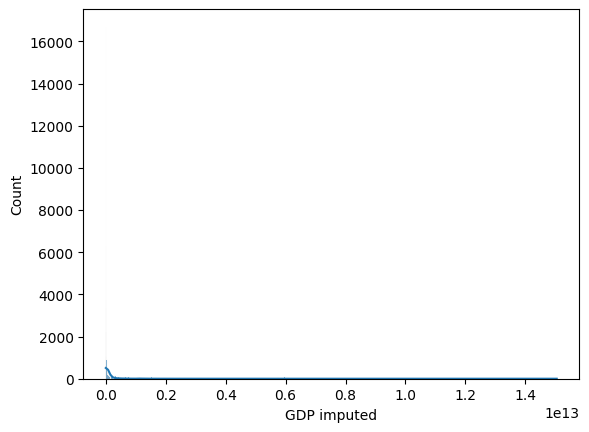

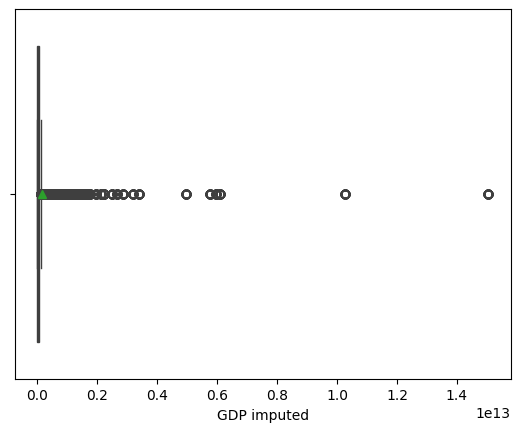

In [479]:

sns.histplot(data=df_with_gdp, x='GDP imputed', kde=True)
plt.show()

sns.boxplot(data= df_with_gdp, x='GDP imputed', showmeans=True)
plt.show()



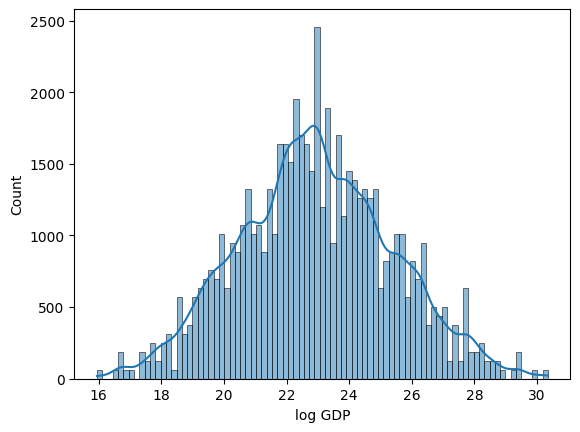

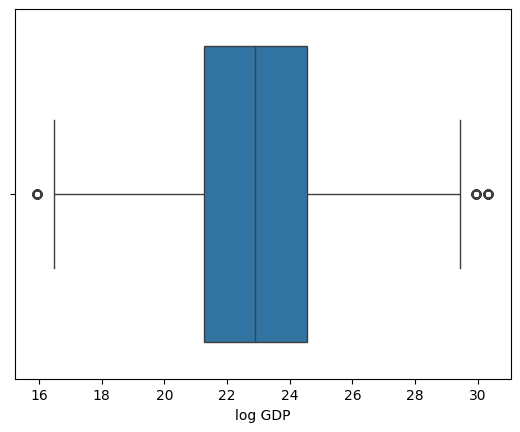

In [480]:
df_with_gdp['log GDP'] = np.log(df_with_gdp['GDP imputed'])

sns.histplot(data=df_with_gdp, x='log GDP', kde=True)
plt.show()

sns.boxplot(data= df_with_gdp, x='log GDP',)
plt.show()

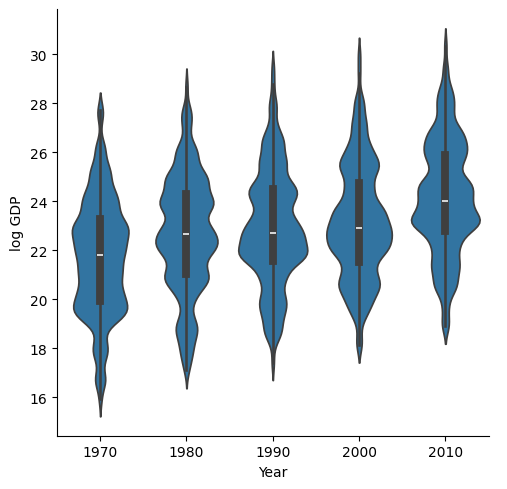

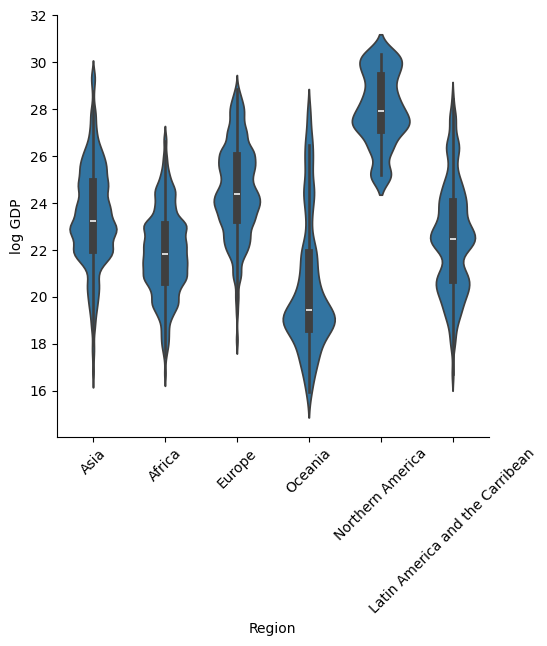

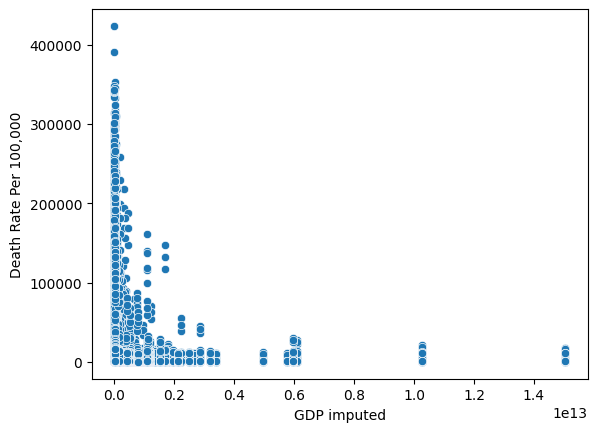

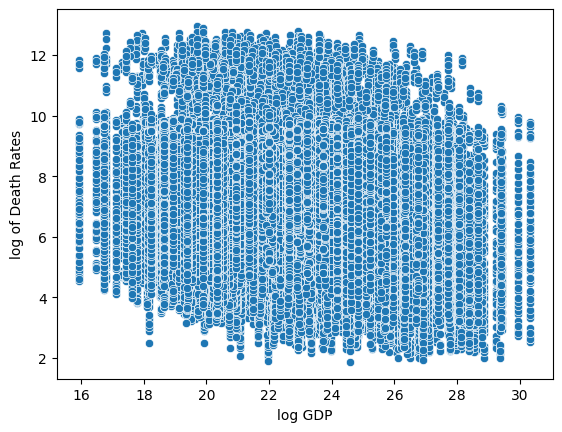

In [481]:
sns.catplot(data = df_with_gdp, x = 'Year', y = 'log GDP', kind='violin')
plt.show()

sns.catplot(data = df_with_gdp, x = 'Region', y = 'log GDP', kind='violin', order=['Asia','Africa','Europe','Oceania','Northern America','Latin America and the Carribean'])
plt.xticks(rotation=45)
plt.show()

sns.scatterplot(data = df_with_gdp, x = 'GDP imputed', y = 'Death Rate Per 100,000')
plt.show()

sns.scatterplot(data = df_with_gdp, x = 'log GDP', y = 'log of Death Rates')
plt.show()

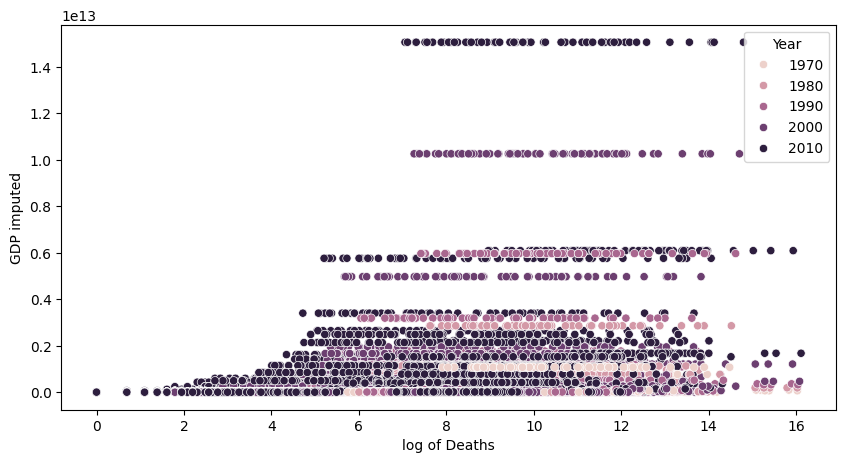

In [482]:
plt.figure(figsize=(10,5))
sns.scatterplot(data= df_with_gdp, x = 'log of Deaths', y = 'GDP imputed', hue='Year')

plt.show()

**Observations**

- According to the distributions for the GDP over the years, the log GDP has increased from 1970-2010. This trend contrasts with the log Death Rates which have slightly decreased over the years.

- When comparing the log GDP of different regions, we can see that the log GDP tends to vary by region. North America's log GDP is relatively high.

- The scatterplots of both the raw data for GDP vs death rates and the log-transformed GDP and death rates do not seem to have any strong linear correlation.

- Looking at the last figure, we can see that the datapoints with high GDP values tend to be from later years. 

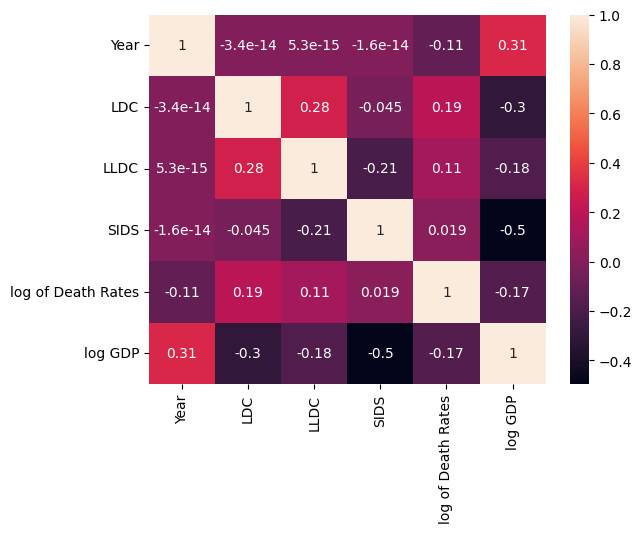

In [483]:
sns.heatmap(data=df3.select_dtypes(include='number').corr(), annot=True)
plt.show()

The numeric data do not seem to have any strong correlations with one another.

# Linear Regression with GDP Feature

In [484]:
dataGDP = pd.get_dummies(
    df3,
    columns = df3.select_dtypes(include = ['object','category']).columns.tolist(),
    drop_first=True, 
)

X = dataGDP.drop('log of Death Rates',axis=1)
y = dataGDP['log of Death Rates']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [485]:
df3

,Year,Age Group,Sex,Region,LDC,LLDC,SIDS,log of Death Rates,log GDP
0,1970,0-6 days,Male,Asia,1,1,0,12.670730,22.994262
1,1970,0-6 days,Female,Asia,1,1,0,12.299313,22.994262
2,1970,0-6 days,Both,Asia,1,1,0,12.506924,22.994262
3,1970,7-27 days,Male,Asia,1,1,0,11.437145,22.994262
4,1970,7-27 days,Female,Asia,1,1,0,11.135982,22.994262
...,...,...,...,...,...,...,...,...,...
58900,2010,80+ years,Female,Africa,0,1,0,9.691556,23.211638
58901,2010,80+ years,Both,Africa,0,1,0,9.719252,23.211638
58902,2010,All ages,Male,Africa,0,1,0,7.186220,23.211638
58903,2010,All ages,Female,Africa,0,1,0,7.100192,23.211638


In [486]:
model3 = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42)) # makes a pipline to scale and use LassoCV for feature selection with 5 folds and reproducibility 
model4 = make_pipeline(StandardScaler(), LinearRegression())

In [514]:
print('Pipeline using StandardScaler and LassoCV (with GDP)')

predict_and_metrics(model3, X_train, y_train, X_test, y_test)


Pipeline using StandardScaler and LassoCV (with GDP)


,Group,r2,MSE,RMSE
0,Training Data,0.921308,0.305186,0.552436
1,Testing Data,0.921703,0.302420,0.549927


In [513]:

print('Pipeline using StandardScaler and LinearRegression (with GDP)')

predict_and_metrics(model4, X_train, y_train, X_test, y_test)


Pipeline using StandardScaler and LinearRegression (with GDP)


,Group,r2,MSE,RMSE
0,Training Data,0.921350,0.305022,0.552288
1,Testing Data,0.921722,0.302346,0.549860


In [489]:
np.exp(0.56) # average error (RMSE) scaled to the actual death rate

1.7506725002961012

In [490]:
df3.shape

(58275, 9)

**Observations**
- Both models' performances were similar to one another, and both of their respective performances on train and test data were also very similar. Therefore, there is no overfitting.
- The MSE and RMSE have mostly stayed the same when compared to the models excluding GDP. 
- The new models' predictions also have a multiplicative error of about 1.75 (Note: these are back-transformed, since GDP and Death Rates are log-transformed)


**With an added socioeconomic feature such as GDP, these linear regression models have little to no change (< 0.01 in r2, MSE, RMSE) in performance in predicting the log-transformed global death rates**

# Decision Tree Regression

I will now use scikit-learn's Decision Tree Regressor to see if its predictions are more accurate.

In [491]:
data.select_dtypes('number')

data[data.select_dtypes('number').columns] = data.select_dtypes('number').astype('float64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    58905 non-null  float64
 1   LDC                                     58905 non-null  float64
 2   LLDC                                    58905 non-null  float64
 3   SIDS                                    58905 non-null  float64
 4   log of Death Rates                      58905 non-null  float64
 5   Age Group_1-4 years                     58905 non-null  bool   
 6   Age Group_10-14 years                   58905 non-null  bool   
 7   Age Group_15-19 years                   58905 non-null  bool   
 8   Age Group_20-24 years                   58905 non-null  bool   
 9   Age Group_25-29 years                   58905 non-null  bool   
 10  Age Group_28-364 days                   58905 non-null  bo

In [492]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

X = data.drop('log of Death Rates', axis=1)
y = data['log of Death Rates']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

treemodel = DecisionTreeRegressor()

In [493]:
def tree_predict_and_metrics(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)


    dfmetrics = pd.DataFrame( {
        'Group':['Training Data','Testing Data'],
        'r2' : [r2_train, r2_test],
        'MSE' : [mse_train, mse_test],
        'RMSE ' : [np.sqrt(mse_train), np.sqrt(mse_test)]
        
    })


    """       
    plt.figure(figsize=(20,20))

    tree.plot_tree(model,
              feature_names= list(X.columns),
              filled=True,
              node_ids = True,
              class_names = True,
              fontsize=10

    )
    plt.show()
    """
    
    
    

    return dfmetrics[:]

In [494]:
print("Decision Tree Regressor Performance: ")
tree_predict_and_metrics(treemodel, X_train, y_train, X_test, y_test)

Decision Tree Regressor Performance: 


,Group,r2,MSE,RMSE
0,Training Data,0.964680,0.137012,0.370152
1,Testing Data,0.951787,0.185888,0.431147


**Observations**

Seeing that the MSE and the RMSE on the training vs. testing data are slightly different, this model may be overfitting. Though these metrics are decent, it could still be a good idea to tune the model using GridSearchCV.

In [495]:
model_tuned = DecisionTreeRegressor(random_state=7)

parameters = {'max_depth' : [5, 10, 15, 20, 25],
              'criterion' : ['squared_error','friedman_mse'],
              'min_samples_leaf' : [5,10,20,15, 100]

              }

scorer = metrics.make_scorer(metrics.r2_score)

grid = GridSearchCV(model_tuned, parameters, scoring = scorer, cv = 5)

grid = grid.fit(X_train, y_train)

model_tuned = grid.best_estimator_

In [496]:
print("TUNED Decision Tree Regressor Performance: ")

tree_predict_and_metrics(model_tuned, X_train, y_train, X_test, y_test)

TUNED Decision Tree Regressor Performance: 


,Group,r2,MSE,RMSE
0,Training Data,0.958805,0.159802,0.399753
1,Testing Data,0.952194,0.184320,0.429325


**Observations** 

- MSE and RMSE: The differences between the MSE and RMSE across training and testing data improved slightly, meaning this model had slightly better generalization and less overfitting. 
- R2: The R2 dropped slightly on the training data, however, the drop is very slight and it could suggest less overfitting.

In [497]:
importances = model_tuned.feature_importances_

imp = pd.DataFrame(importances, columns = ['Importance'], index= X_train.columns).sort_values(by= 'Importance', ascending=False)
imp

,Importance
Age Group_10-14 years,0.101589
Age Group_5-9 years,0.100142
Age Group_80+ years,0.080419
Age Group_15-19 years,0.069617
Age Group_20-24 years,0.053907
Age Group_25-29 years,0.051432
Age Group_30-34 years,0.049241
Age Group_35-39 years,0.047551
Age Group_1-4 years,0.045265
LDC,0.044063


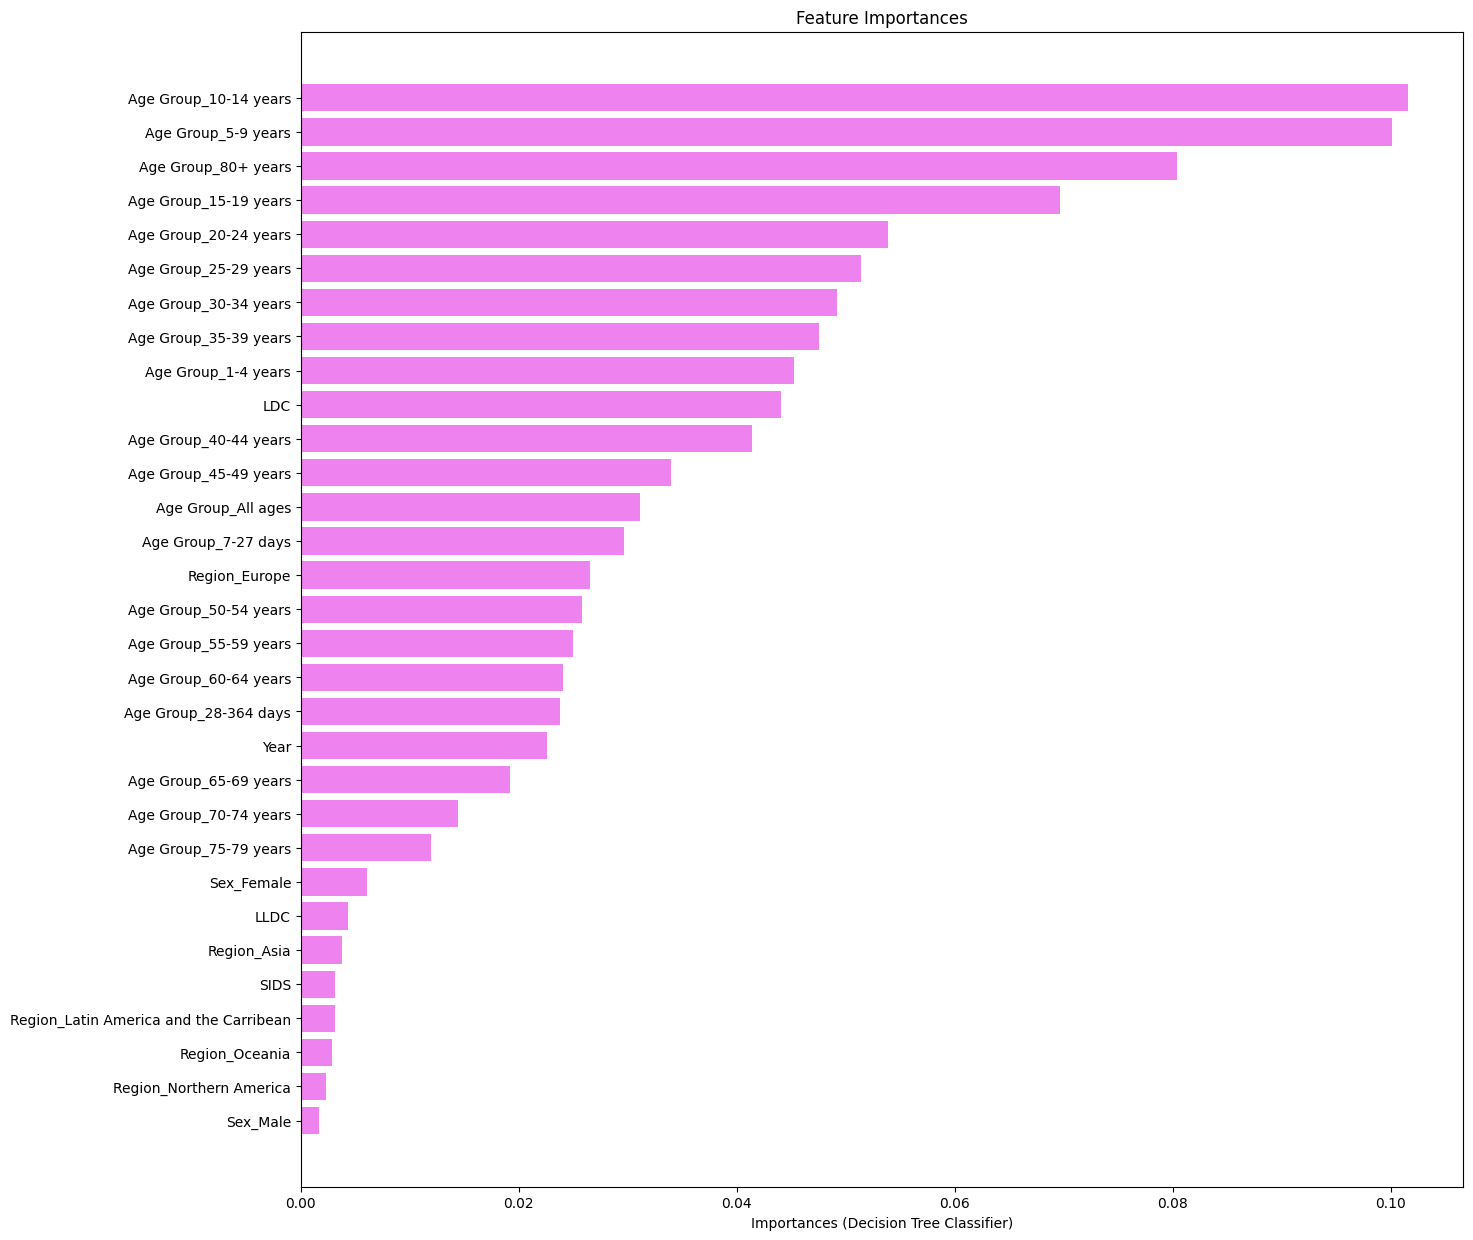

In [498]:
plt.figure(figsize=(15,15))
index = np.argsort(importances)
featureN = list(X.columns)

plt.barh(range(len(index)), importances[index], color = 'violet', align = 'center')

plt.yticks(range(len(index)), [featureN[i] for i in index])

plt.xlabel('Importances (Decision Tree Classifier)')

plt.title('Feature Importances')

plt.show()

# Decision Tree Regressor with GDP Feature

In [499]:
dataGDP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58275 entries, 0 to 58904
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    58275 non-null  int64  
 1   LDC                                     58275 non-null  int64  
 2   LLDC                                    58275 non-null  int64  
 3   SIDS                                    58275 non-null  int64  
 4   log of Death Rates                      58275 non-null  float64
 5   log GDP                                 58275 non-null  float64
 6   Age Group_1-4 years                     58275 non-null  bool   
 7   Age Group_10-14 years                   58275 non-null  bool   
 8   Age Group_15-19 years                   58275 non-null  bool   
 9   Age Group_20-24 years                   58275 non-null  bool   
 10  Age Group_25-29 years                   58275 non-null  bool   

In [500]:
dataGDP[dataGDP.select_dtypes('number').columns] = dataGDP.select_dtypes('number').astype('float64')
dataGDP

,Year,LDC,LLDC,SIDS,log of Death Rates,log GDP,Age Group_1-4 years,Age Group_10-14 years,Age Group_15-19 years,Age Group_20-24 years,...,Age Group_75-79 years,Age Group_80+ years,Age Group_All ages,Sex_Female,Sex_Male,Region_Asia,Region_Europe,Region_Latin America and the Carribean,Region_Northern America,Region_Oceania
0,1970.0,1.0,1.0,0.0,12.670730,22.994262,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,1970.0,1.0,1.0,0.0,12.299313,22.994262,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,1970.0,1.0,1.0,0.0,12.506924,22.994262,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1970.0,1.0,1.0,0.0,11.437145,22.994262,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,1970.0,1.0,1.0,0.0,11.135982,22.994262,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58900,2010.0,0.0,1.0,0.0,9.691556,23.211638,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
58901,2010.0,0.0,1.0,0.0,9.719252,23.211638,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
58902,2010.0,0.0,1.0,0.0,7.186220,23.211638,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
58903,2010.0,0.0,1.0,0.0,7.100192,23.211638,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False


In [501]:
X = dataGDP.drop('log of Death Rates', axis=1)
y = dataGDP['log of Death Rates']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

treemodel2 = DecisionTreeRegressor()

In [509]:
model_tuned2 = DecisionTreeRegressor(random_state=7)

parameters = {'max_depth' : [5, 10, 15, 20, 25],
              'criterion' : ['squared_error','friedman_mse'],
              'min_samples_leaf' : [5,10,20,15, 100]

              }

scorer = metrics.make_scorer(metrics.r2_score)

grid = GridSearchCV(model_tuned2, parameters, scoring = scorer, cv = 5)

grid = grid.fit(X_train, y_train)

model_tuned2 = grid.best_estimator_

In [510]:
print("TUNED Decision Tree Regressor Performance with GDP")
tree_predict_and_metrics(model_tuned2, X_train, y_train, X_test, y_test)

TUNED Decision Tree Regressor Performance with GDP


,Group,r2,MSE,RMSE
0,Training Data,0.972675,0.105973,0.325535
1,Testing Data,0.956431,0.168283,0.410223


In [511]:
importances2 = model_tuned2.feature_importances_

imp2 = pd.DataFrame(importances2, columns = ['Importance'], index= X_train.columns).sort_values(by= 'Importance', ascending=False)
imp2

,Importance
Age Group_10-14 years,0.101043
Age Group_5-9 years,0.098570
Age Group_80+ years,0.078011
Age Group_15-19 years,0.068714
Age Group_20-24 years,0.052881
Age Group_25-29 years,0.050904
Age Group_30-34 years,0.047467
Age Group_35-39 years,0.046746
Age Group_1-4 years,0.045569
LDC,0.042604


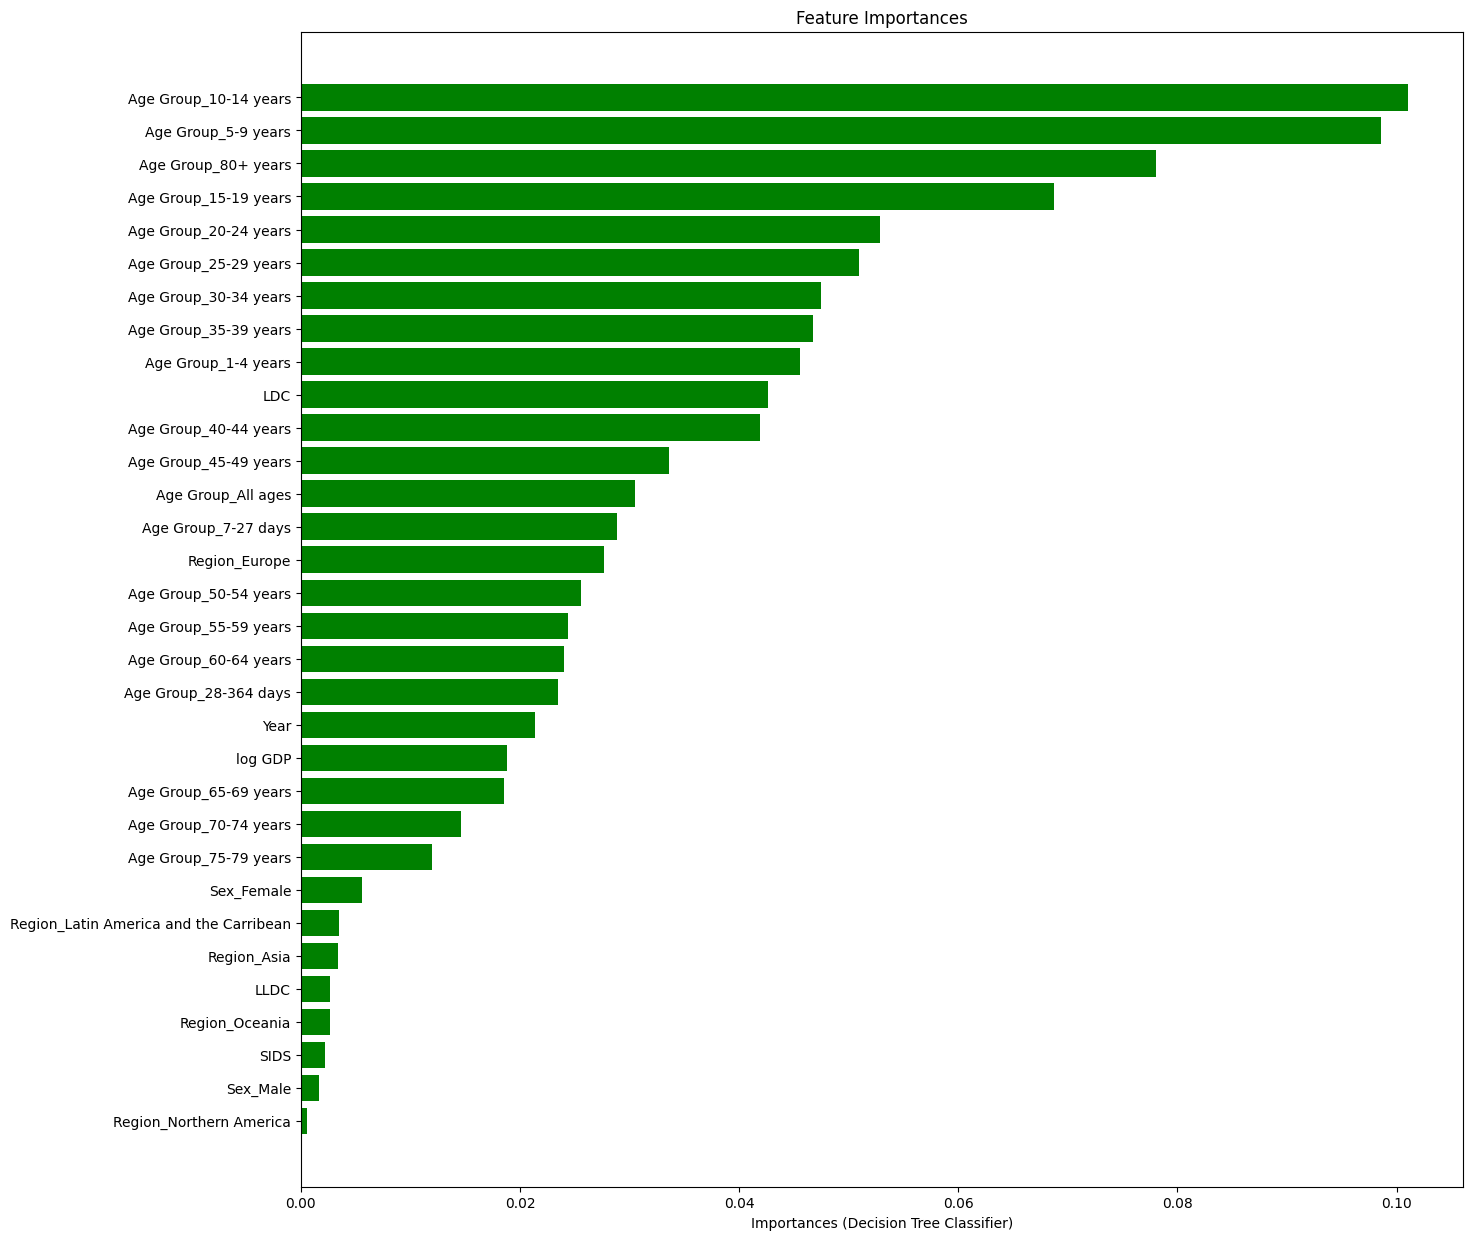

In [512]:
plt.figure(figsize=(15,15))
index = np.argsort(importances2)
featureN = list(X.columns)

plt.barh(range(len(index)), importances2[index], color = 'green', align = 'center')

plt.yticks(range(len(index)), [featureN[i] for i in index])

plt.xlabel('Importances (Decision Tree Classifier)')

plt.title('Feature Importances')

plt.show()

**Observations** 

- This model including GDP performed better in terms of training and testing performances, and the model is not overfitting as testing and training performance are fairly similar.
- The log GDP has a feature importance of: 0.018842, which is not very much relative to the other features.
- The most important features in determining the log Death Rate are the  **age groups**

# Conclusions

- Using Linear Regression model, the R^2 values were 0.91 and 0.92, without and with GDP, respectively.
    - ~ %92 of the variability in the log death rates are explained by the independent variables.
- Using the Linear Regression model, the RMSE values were 0.56 and 0.55 without and with GDP, respectively.
    - The average difference between the predicted values and the actual values had a multiplicative factor of ~1.75x when back-scaled from the log transformations.
---
- Using the Decision Tree Regressor model, the R^2 values were 0.95 and ~0.96, wihtout and with GDP, respectively.
    - ~ %95 of the variability in the log death rates are explained by the independent variables.
- Using the Decision Tree Regressor model, the RMSE values were 0.43 and 0.41, with and without GDP, respectively.
    - The average difference between the predicted values and the actual values had a multiplicative factor of ~1.5 when back-scaled from the log transformations.
---
- The Decision Tree had better overall performance (higher R^2 and lower RMSE), but at the cost of slightly higher overfitting
- The Linear Regression is more stable and generalizable due to the more consistent performances on testing data.
- GDP adds marginal improvements to both models, but the effects are small.
